![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

# Classification
## Decision Tree

### Bemorga dori tavsiya qilish tizimi

Tasavvur qiling, siz tadqiqot uchun ma'lumot to'playotgan tibbiy tadqiqotchisiz. Siz bir xil kasallikdan aziyat chekkan bemorlar haqida ma'lumot to'pladingiz. Davolash kursi davomida bemorlarga 5 xil doridan biri ijobiy ta'sir qildi.

Sizning vazifangiz, xuddi shu kasallik bilan kasallangan kelajakdagi bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish. Ushbu muammo ko'p toifali klassifikator (multiclass classification) yordamida xal qilinadi.

Model yaratish uchun Decision Tree algoritmidan foydalanamiz.

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

Ustunlar:
- `Age` - yosh
- `Sex` - jins
- `BP` - qon bosimi
- `Cholesterol` - qondagi xolesterol
- `Na_to_K` - organizmdagi natriy miqdorining kaliyga nisbati

In [5]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
15,16,F,HIGH,NORMAL,15.516,drugY
124,53,F,HIGH,NORMAL,12.495,drugB
187,47,M,HIGH,HIGH,10.403,drugA
87,69,M,LOW,HIGH,15.478,drugY
143,74,M,HIGH,NORMAL,15.436,drugY
113,65,F,LOW,NORMAL,13.769,drugX
195,56,F,LOW,HIGH,11.567,drugC
132,49,M,LOW,NORMAL,13.598,drugX
85,59,M,HIGH,HIGH,13.935,drugB
88,37,F,HIGH,NORMAL,23.091,drugY


Matnli ustunlarga ishlov beramiz

In [6]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
15,16,0,0,1,15.516,drugY
50,58,0,0,0,19.416,drugY
93,42,0,1,1,29.271,drugY
111,47,0,2,1,6.683,drugX
136,55,0,0,0,10.977,drugB
139,69,0,2,0,10.065,drugX
162,43,1,2,1,12.859,drugX
41,58,0,0,1,14.239,drugB
49,28,0,1,0,19.796,drugY
58,60,1,2,1,10.091,drugX


`X` va `y` ni ajratib olamiz

In [7]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [8]:
y = df['Drug'].values

### Train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

### Model

In [10]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Baholash

In [11]:
y_predict = tree_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [18]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


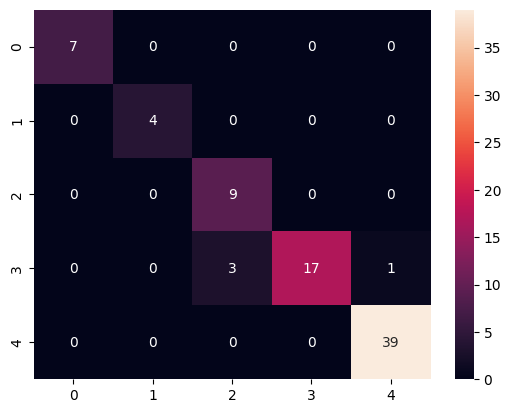

In [19]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Cross-validation**

In [20]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



## Decision Tree chizamiz

In [22]:
cols

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

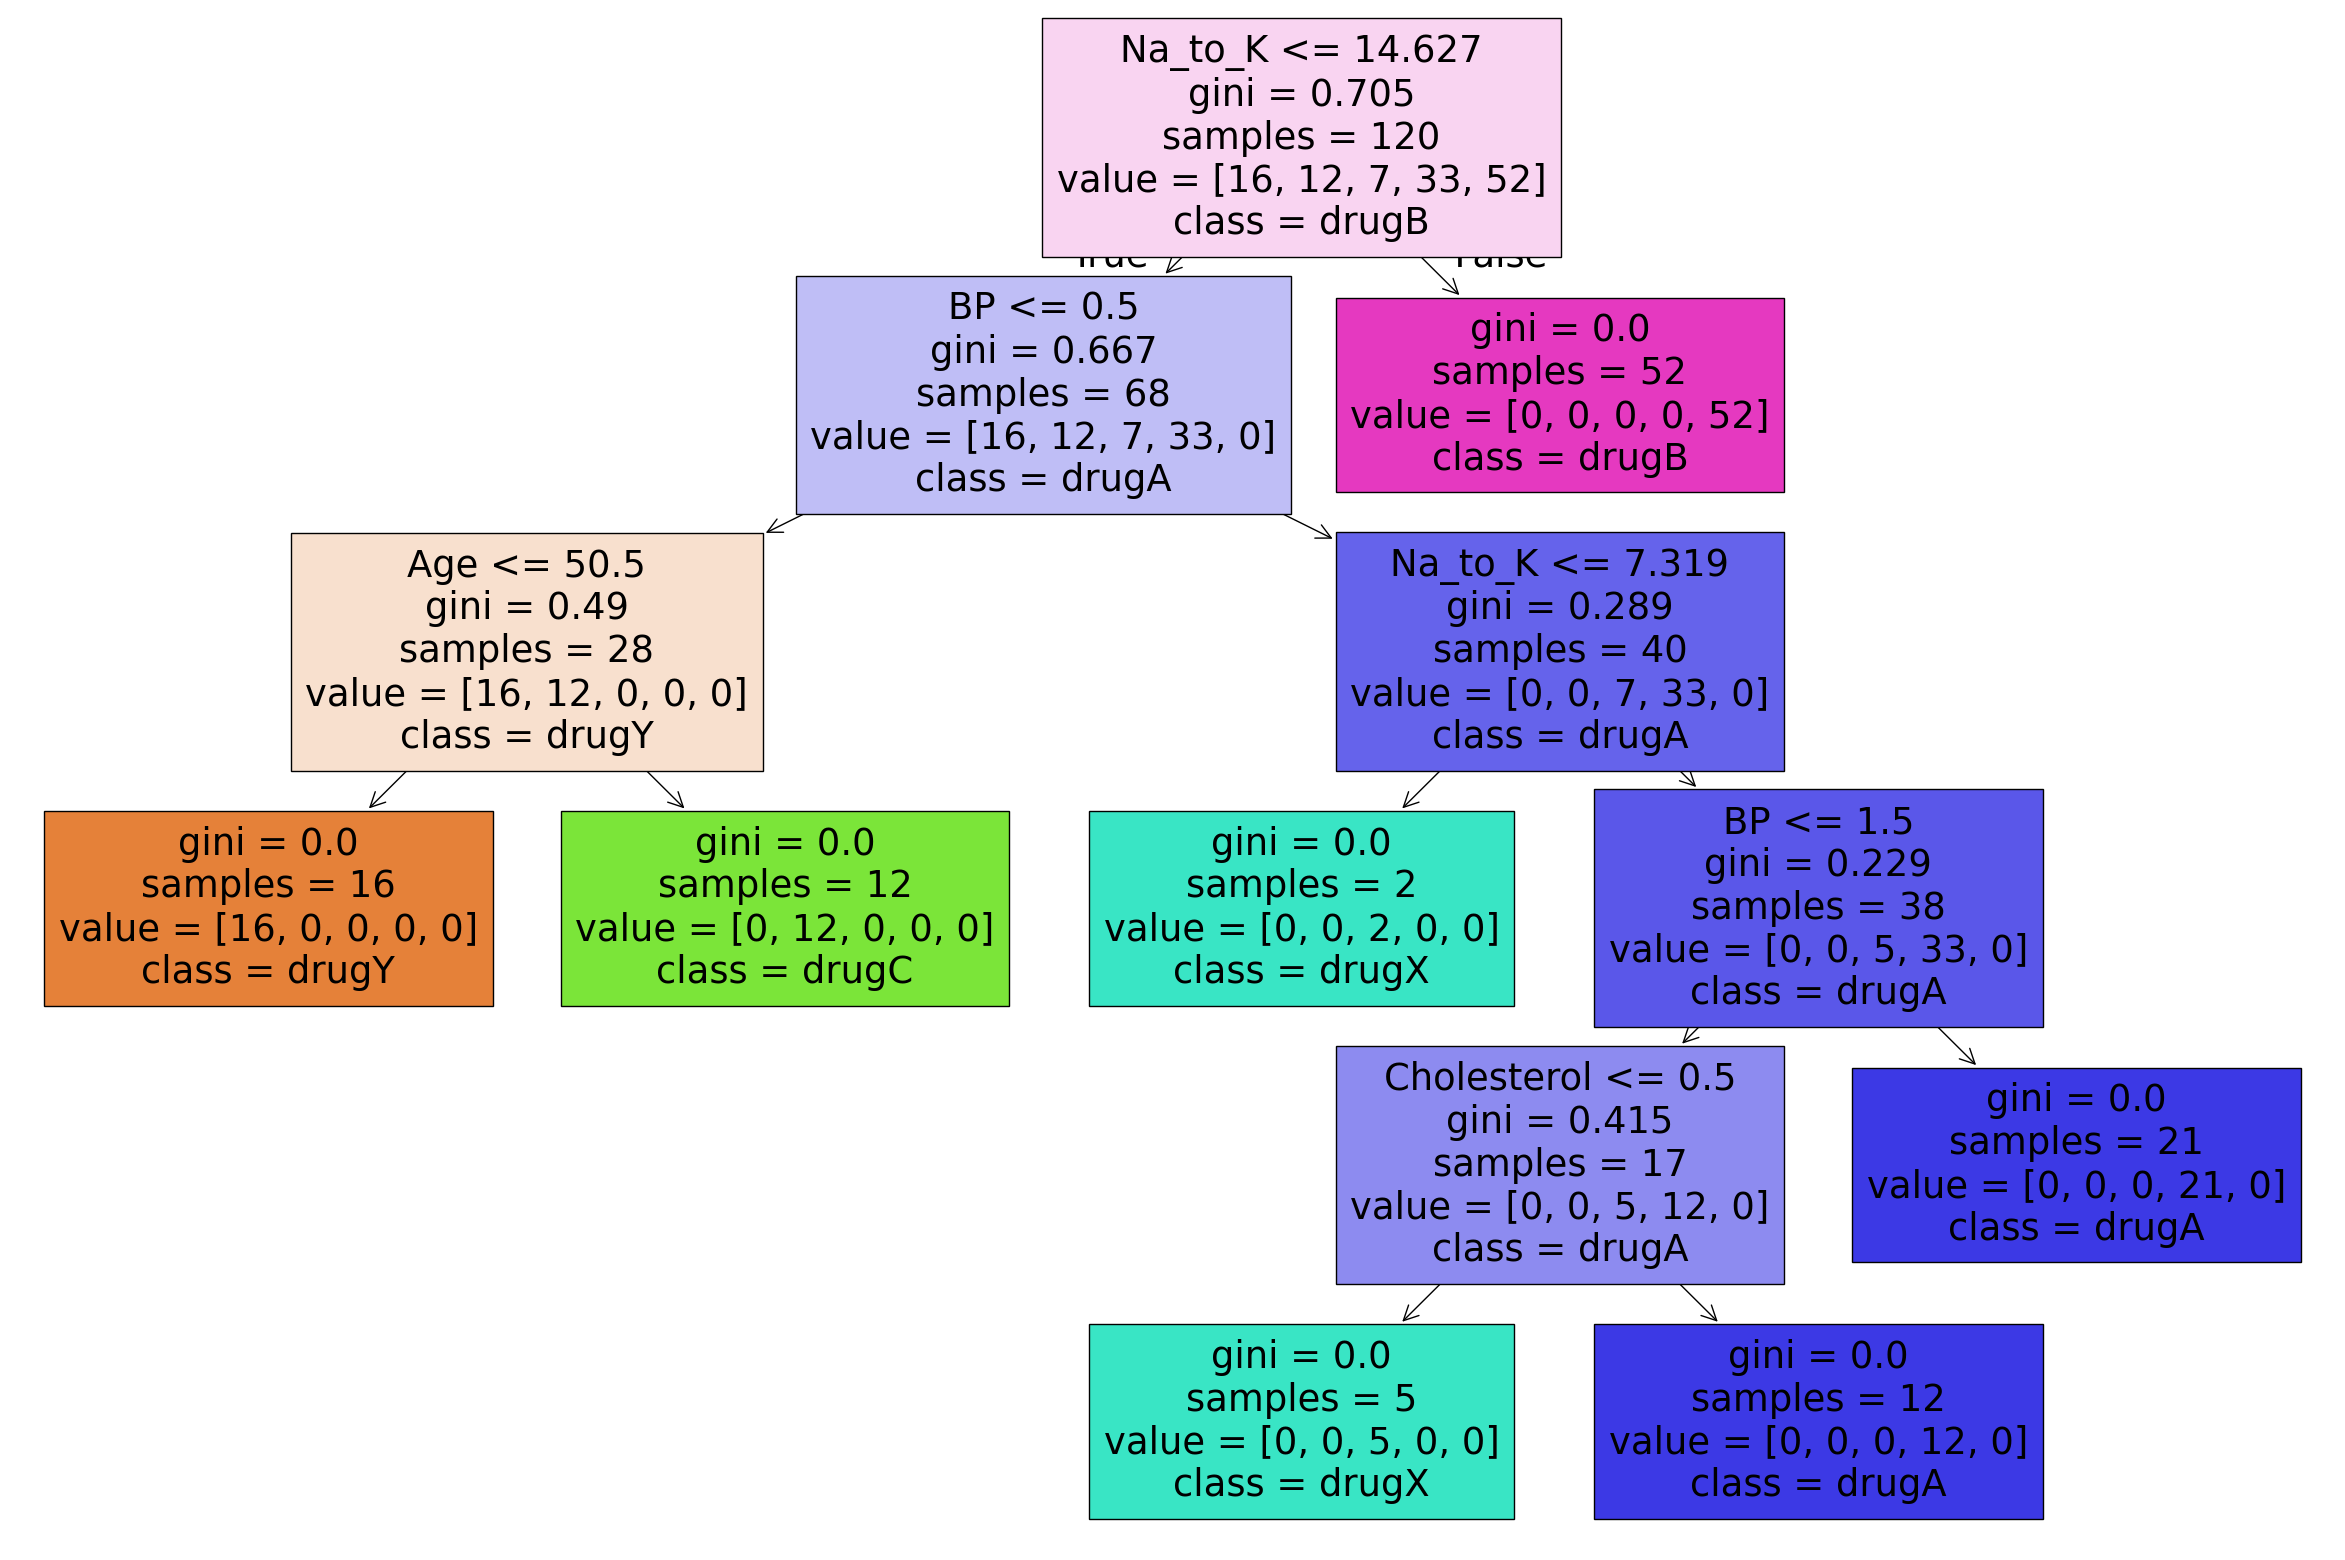

In [21]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

# Hyperparameters

Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin.

k-NN uchun bu `k` ya'ni qo'shnilar soni edi. Decision Treen da esa bir nechta giperparametrlar mavjud. Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**`min_impurity_decrease'** - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0

DecisionTrees's Accuracy:  0.95


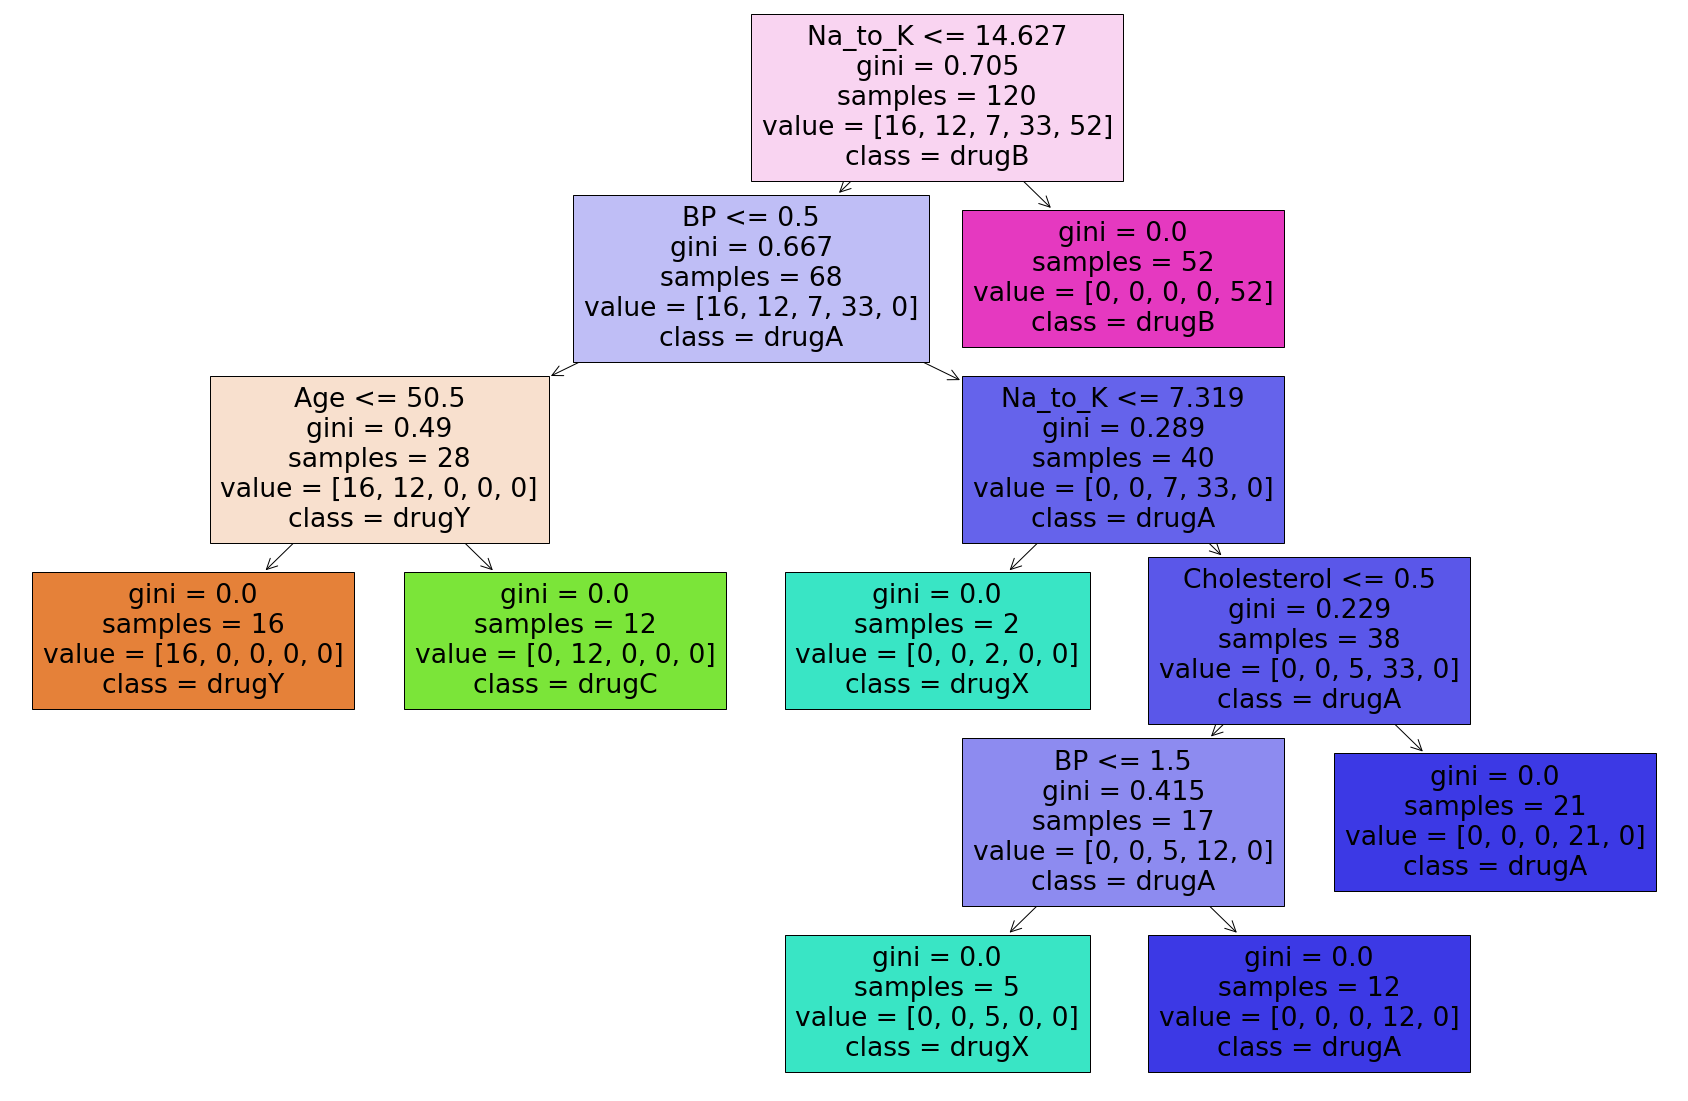

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**`max_depth`** - shajara qavatlari soni

DecisionTrees's Accuracy:  0.8375


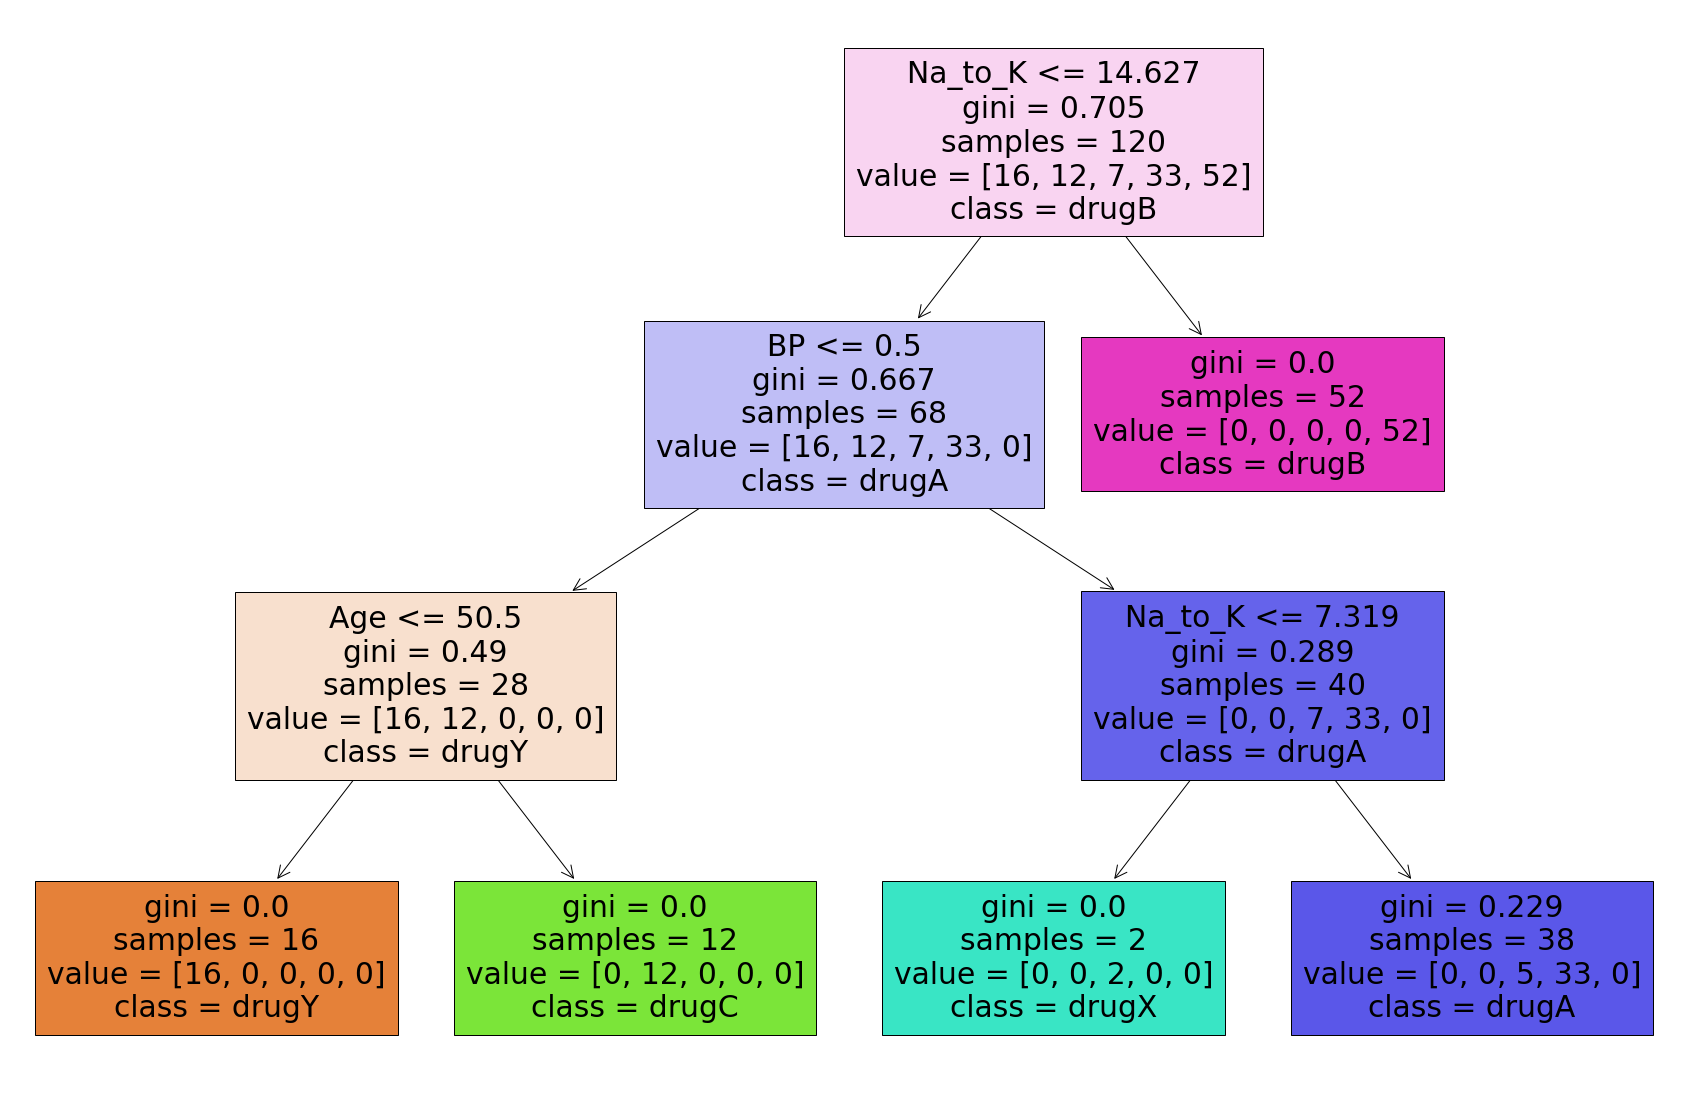

In [ ]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**`min_samples_leaf`** - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTrees's Accuracy:  0.875


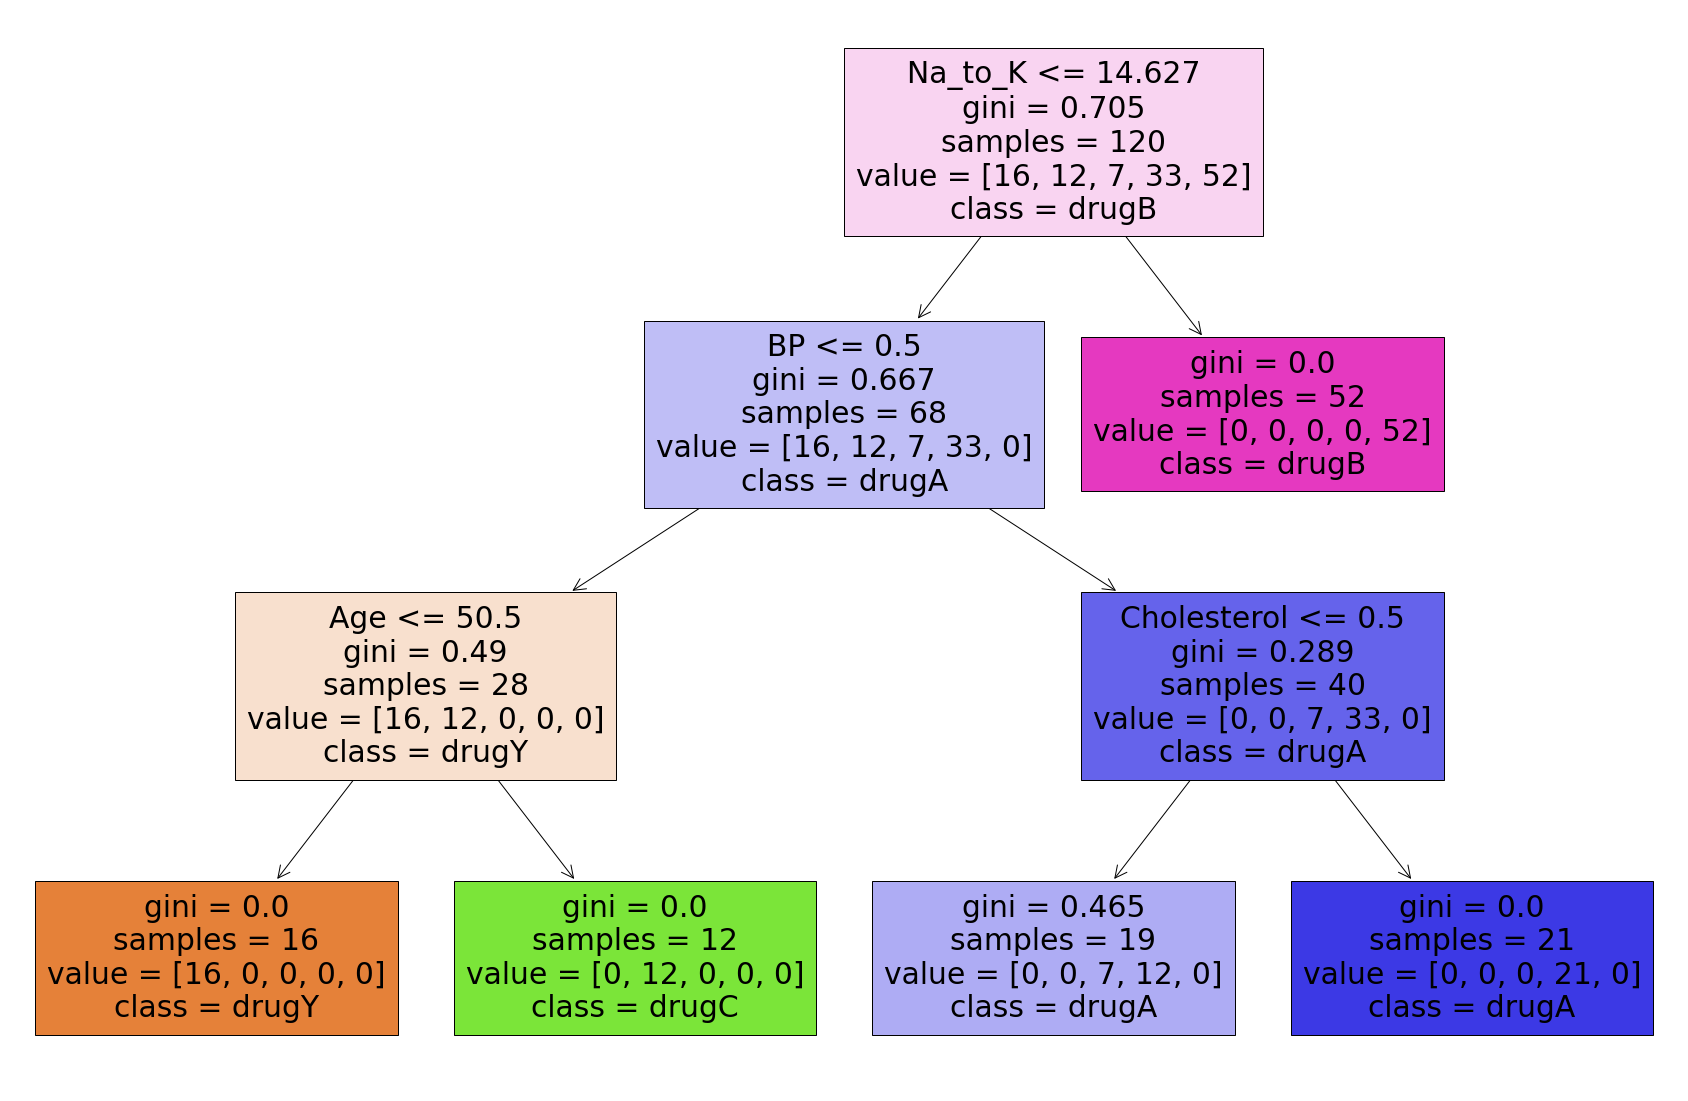

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

## Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.


In [24]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.78      0.88         9
       drugX       0.91      0.95      0.93        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.96        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [25]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9625
